# Images
https://github.com/timholy/Images.jl

In [ ]:
Pkg.add("Images")

In [1]:
using Images
using ImageMagick
using FixedPointNumbers

## Create Images

In [ ]:
img = rand(400, 400)
convert(Image, img)

In [ ]:
function mandelbrot(a, maxiter)
    z = 0
    for i=1:maxiter
        z = z^2 + a
    end
    return maxiter-z
end

iterations = 35
 
for yy=1:400
    y = -(yy/200.0-1)
    for xx=1:400
        x = xx/400.0*2.5 -2.0
        v = abs(mandelbrot(complex(x, y), iterations))
        img[xx,yy] = 3*log(v)/log(iterations-1.0)
    end
end
convert(Image, img)

## Color Images

In [ ]:
cimg = [ Colors.RGB(rand(), rand(), rand()) for x=1:200, y=1:200]
Image( cimg)

## Load Images

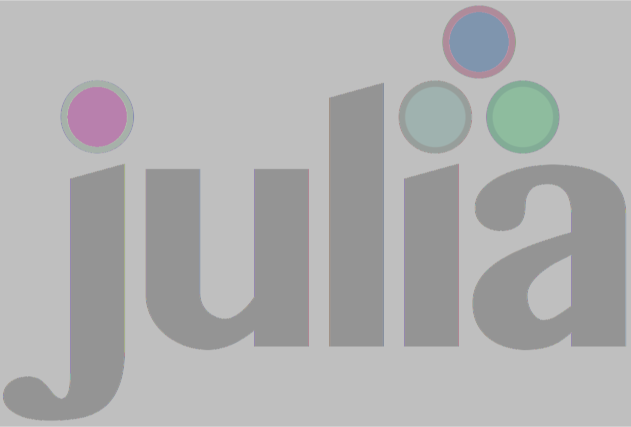

In [8]:
julia = load("julia.png")

In [ ]:
properties(julia)

In [ ]:
using ImageView
view(julia)

In [2]:
img = load("071207012001.nrrd")

Gray Images.Image with:
  data: 768x768x165 Array{UInt8,3}
  properties:
    spaceunits:  microns microns microns
    colorspace: Gray
    spatialorder:  x y z
    spacedirections:  [0.5488876083963494,0.0,0.0] [0.0,0.5488876083963494,0.0] [0.0,0.0,1.0]
    comments:  Created by Nrrd_Writer at Mon Nov 02 19:57:16 CET 2015
    pixelspacing:  0.5488876083963494 0.5488876083963494 1.0

 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 in load at /home/florian/.julia/v0.4/NRRD/src/NRRD.jl:225
 in load at /home/florian/.julia/v0.4/NRRD/src/NRRD.jl:83
 in load at /home/florian/.julia/v0.4/FileIO/src/loadsave.jl:77
 in load at /home/florian/.julia/v0.4/FileIO/src/loadsave.jl:42
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/florian/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/florian/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[2], in expression starting on line 1


In [ ]:
properties(img)

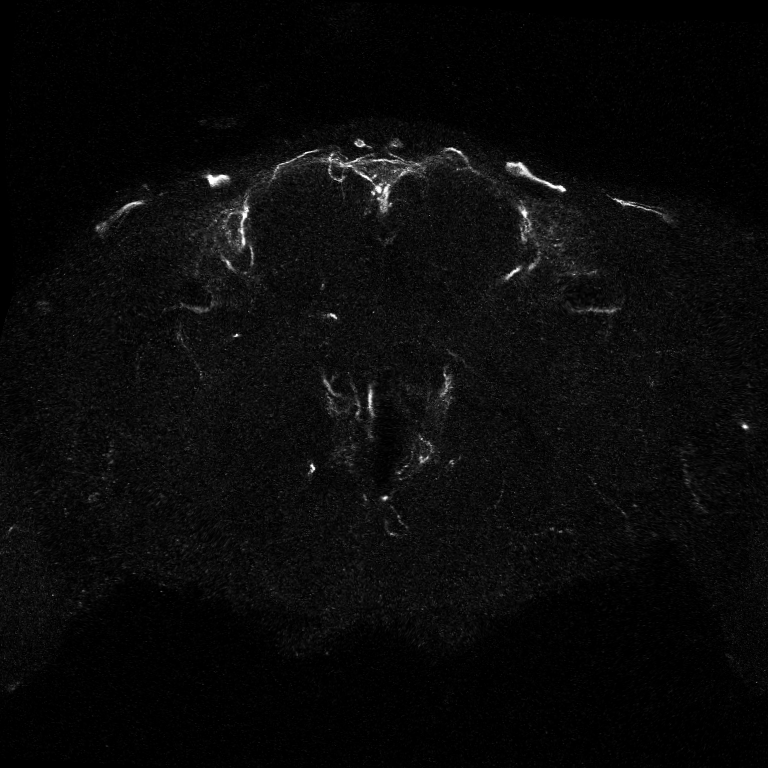

In [3]:
simg = reinterpret(UFixed8, img)
sliceim(simg,:,:,50)

  likely near /home/florian/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/florian/.julia/v0.4/Interact/src/IJulia/setup.jl:157


Interact.Slider{Int64}([Reactive.Input{Int64}] 83,"z",83,1:165)

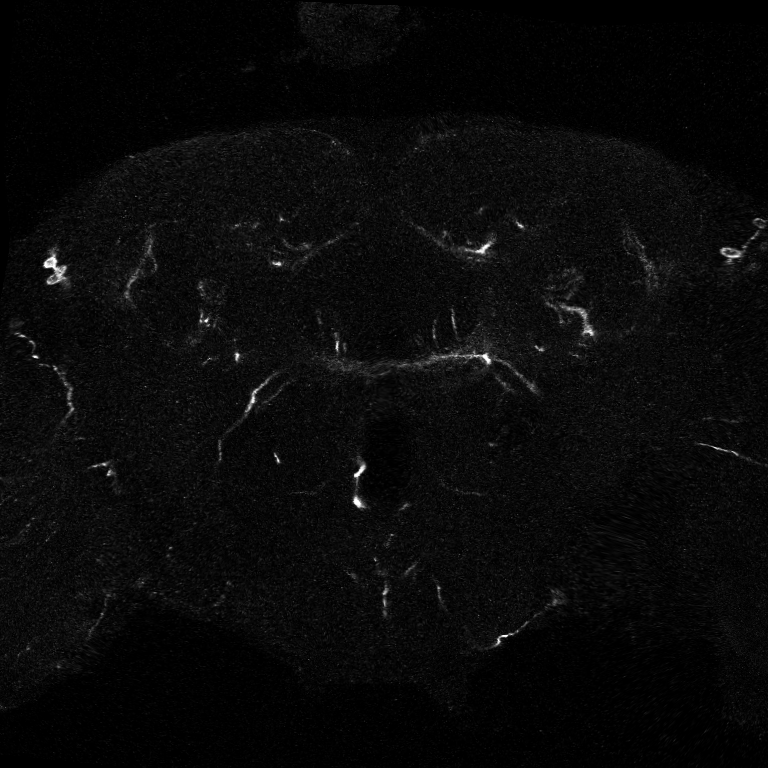

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in include at ./boot.jl:261
 in include_from_node1 at ./loading.jl:304
 in require at ./loading.jl:243
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/florian/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/florian/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/florian/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [4]:
using Interact

@manipulate for z=1:165
    sliceim(simg, :,:,z)
end

## Get The Data

In [6]:
#data(simg)
raw(simg)

768x768x165 Array{UInt8,3}:
[:, :, 1] =
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00  …  0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00  0x00  0x00     0x00  0x00  0x00  0x

## Image Processing

Interact.Slider{Int64}([Reactive.Input{Int64}] 25,"s",25,1:50)

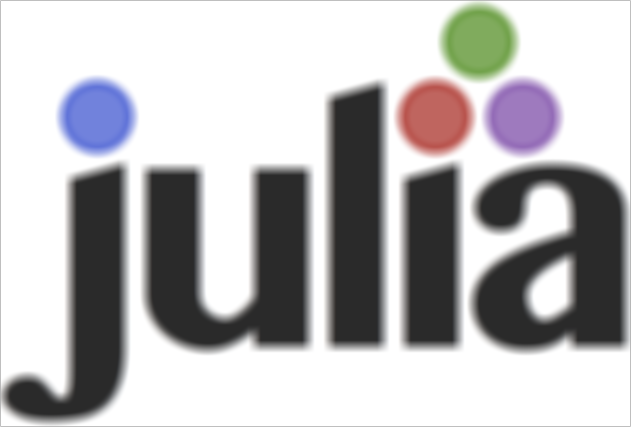

In [9]:
using Interact
@manipulate for s=1:50
    kern = ones(Float32,s,s)/(s*s)
    imfilter(julia, kern)
end

## Other Graphics Libraries
* Cairo https://github.com/JuliaLang/Cairo.jl
* GLFW http://github.com/JuliaGL/GLFW.jl
* ModernGl https://github.com/JuliaGL/ModernGL.jl